# The aim is to perform various "EDA"process to understand the inside out of the sales of each product at a particular store by using various statistics measures. Using this Analysis BigMart will try to understand the properties of products and stores which will play a key role in increasing sales.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import norm

In [ ]:
train=pd.read_csv('Train.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print('Train:',train.shape)

Train: (8523, 12)


In [ ]:
print('Train_Columns:',train.columns)

Train_Columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [ ]:
train.isnull().sum()/100 #Here we can see the percentage of missing values in the features

Item_Identifier               0.00
Item_Weight                  14.63
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  24.10
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [ ]:
missing_data=train.isnull().sum()
percentage=(missing_data.sum()/len(train))*100
print(f'The total percentage of missing data is {round(percentage,2)}%')

The total percentage of missing data is 45.44%


In [ ]:
#To check total no. unique values in the features
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [ ]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
train['Outlet_Size']=train['Outlet_Size'].map({'Small':1,'Medium':2,'High':3})

In [ ]:
print('The median value:',train['Outlet_Size'].median())
train['Outlet_Size'].fillna(train['Outlet_Size'].median(),inplace=True)

The median value: 2.0


In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


In [ ]:
#statistical description
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,1.829168,2181.288914
std,4.226124,0.051598,62.275067,8.371760,0.600327,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,1.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,1.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,2.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,2.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,3.000000,13086.964800


we can ignore the column of 'Outlet_Establishment_Year' and	'Outlet_Size' as year not representing any numerical column but categorical and outlet size we can ignore or convert it into object data type as the function 'decribe' wont make no sense when it comes to measure it statistical interference.

In [ ]:
train['Item_Visibility'].min()

0.0

In [ ]:
train['Item_Visibility']=train['Item_Visibility'].replace(0.000000,0.003547)
#as item visibility cannot be zero that's why we are replacing with the minimum number

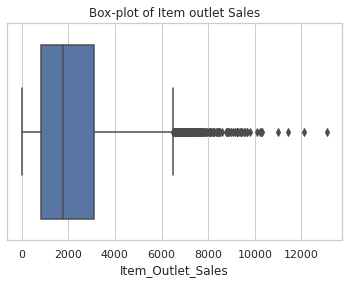

In [ ]:
#detecting of outlier
plt.title('Box-plot of Item outlet Sales')
sns.boxplot('Item_Outlet_Sales',data=train)

The outlier for Item outlet sales features has been observed from the values <6200

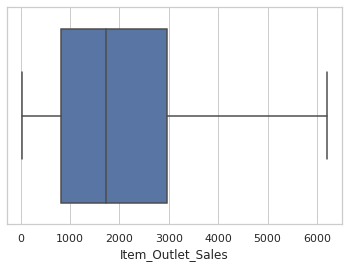

In [ ]:
train=train[train['Item_Outlet_Sales']<6200]
sns.boxplot('Item_Outlet_Sales',data=train)

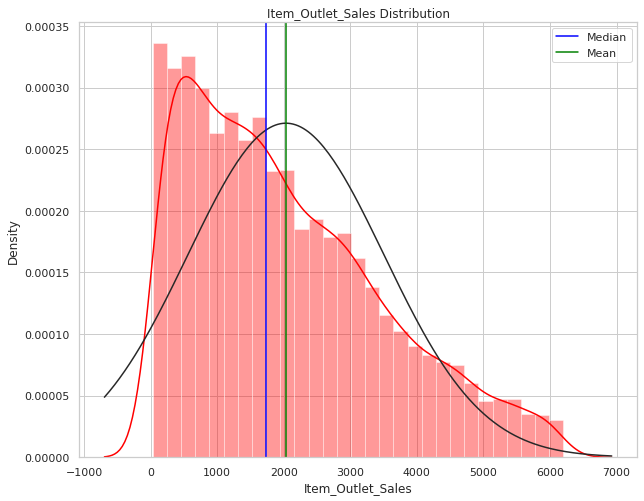

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Outlet_Sales'],fit=norm ,color='red')
plt.title('Item_Outlet_Sales Distribution')
plt.axvline(train['Item_Outlet_Sales'].median(),color='blue',label='Median')
plt.axvline(train['Item_Outlet_Sales'].mean(),color='green',label='Mean')
plt.legend()

In [ ]:
Skewness=train['Item_Outlet_Sales'].skew()
Kurtosis=train['Item_Outlet_Sales'].kurt()
print('Skewness:',round(Skewness,3))
print('Kurtosis:',round(Kurtosis,3))

Skewness: 0.74
Kurtosis: -0.224


1.we can say that the distribution is rightly skewed which says that the some of the item has less then the mean value.
2.The distribution curve is less prone to outlier.

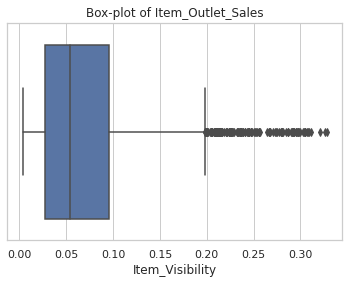

In [ ]:
plt.title('Box-plot of Item_Outlet_Sales')
sns.boxplot('Item_Visibility',data=train)

The outlier for Item_Visibility has been observed<0.177

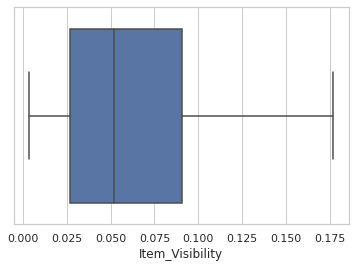

In [ ]:
train=train[train['Item_Visibility']<0.177]
sns.boxplot('Item_Visibility',data=train)

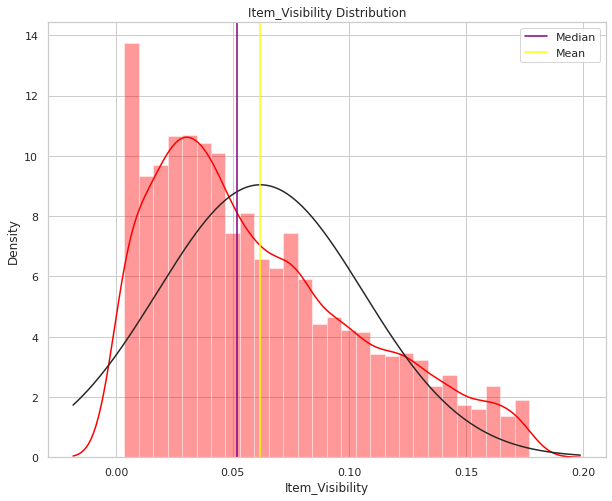

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Visibility'],fit=norm,color='red')
plt.title('Item_Visibility Distribution')
plt.axvline(train['Item_Visibility'].median(),color='purple',label='Median')
plt.axvline(train['Item_Visibility'].mean(),color='yellow',label='Mean')
plt.legend()

In [ ]:
Skewness=train['Item_Visibility'].skew()
Kurtosis=train['Item_Visibility'].kurt()
print('Skewness:',round(Skewness,3))
print('Kurtosis:',round(Kurtosis,3))

Skewness: 0.707
Kurtosis: -0.387


1.We can see Distribution is rightly skewed and some items are less visible then mean values and hence it is less prone to outliers.

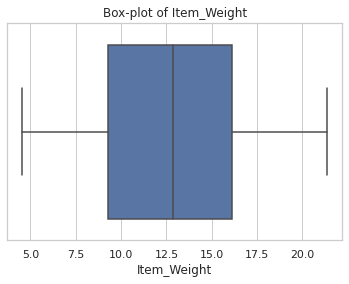

In [ ]:
plt.title('Box-plot of Item_Weight')
sns.boxplot('Item_Weight',data=train)

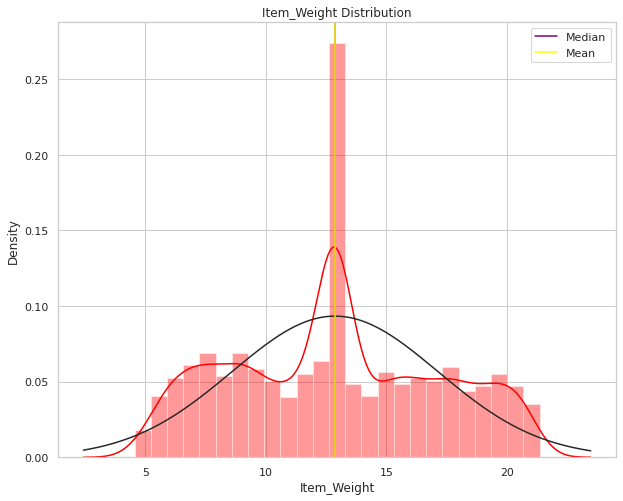

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Weight'],fit=norm,color='red')
plt.title('Item_Weight Distribution')
plt.axvline(train['Item_Weight'].median(),color='purple',label='Median')
plt.axvline(train['Item_Weight'].mean(),color='yellow',label='Mean')
plt.legend()

The Distribution looks symmetric as mean and median values are almost equal or same.

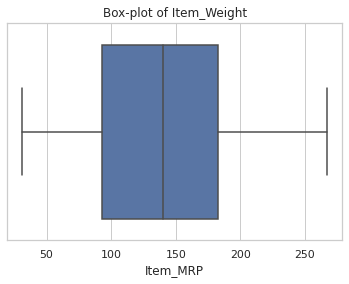

In [ ]:
plt.title('Box-plot of Item_Weight')
sns.boxplot('Item_MRP',data=train)

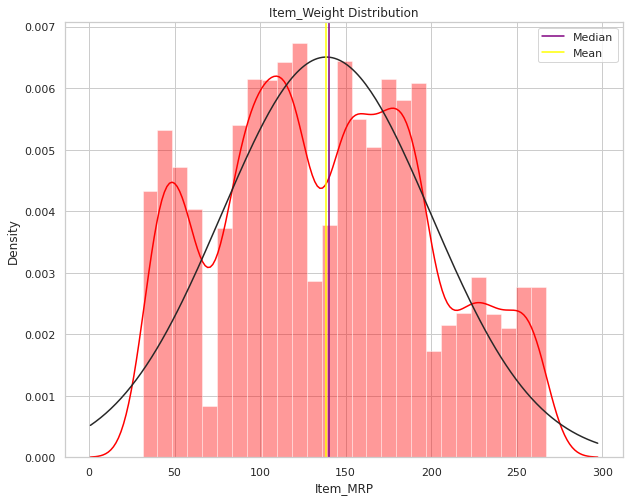

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_MRP'],fit=norm,color='red')
plt.title('Item_Weight Distribution')
plt.axvline(train['Item_MRP'].median(),color='purple',label='Median')
plt.axvline(train['Item_MRP'].mean(),color='yellow',label='Mean')
plt.legend()

The distribution looks symmetric as the mean and median values look alomst equal or same.

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    4801
Regular    2718
LF          298
reg         113
low fat     104
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('low fat','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('LF','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')
train['Item_Fat_Content'].value_counts()

Low Fat    5203
Regular    2831
Name: Item_Fat_Content, dtype: int64

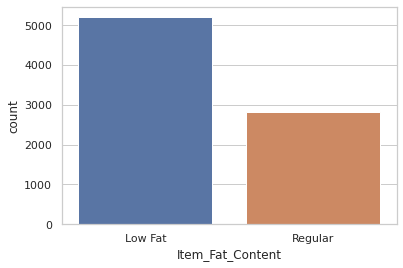

In [ ]:
sns.countplot('Item_Fat_Content',data=train)

We can see that Low fat product has more preference than Regular food

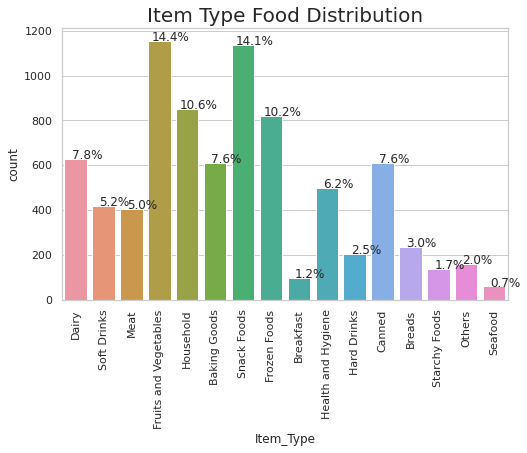

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train))
ax = sns.countplot('Item_Type',data=train)
plt.xticks(rotation=90)
plt.title('Item Type Food Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

From the above graph we can see that item such as Fruits & Vegetables ,snack foods and Household items are most frequently brought followed by Frozen foods.

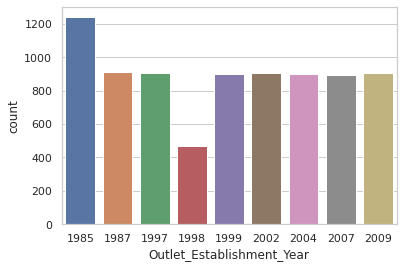

In [ ]:
sns.countplot('Outlet_Establishment_Year',data=train)

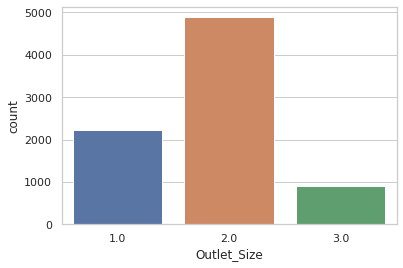

In [ ]:
sns.countplot('Outlet_Size',data=train)

As 1 represent Low 2 represent Medium and 3 represent High

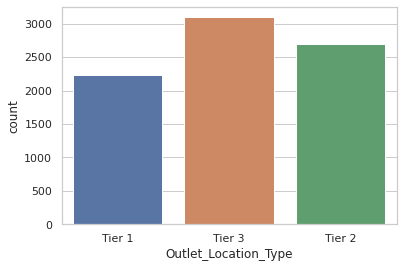

In [ ]:
sns.countplot(train['Outlet_Location_Type'])

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

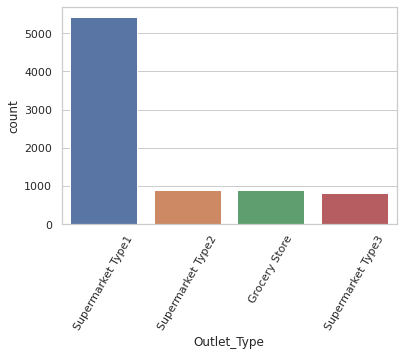

In [ ]:
sns.countplot(train['Outlet_Type'])
plt.xticks(rotation=60)

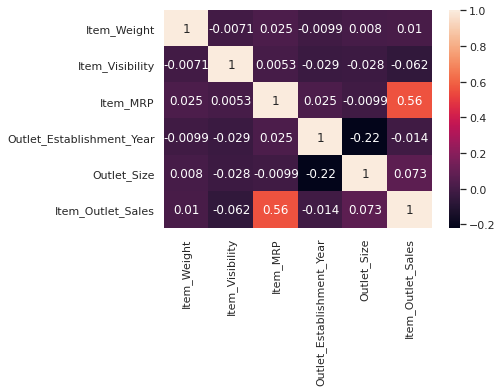

In [ ]:
sns.heatmap(train.corr(),annot=True)

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

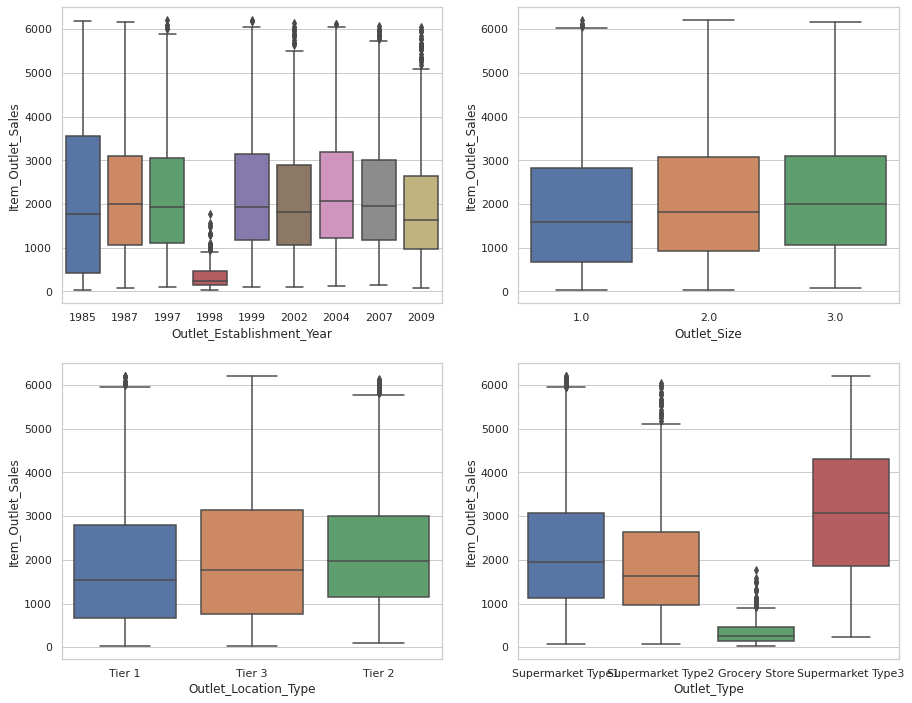

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=train)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=train)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=train)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

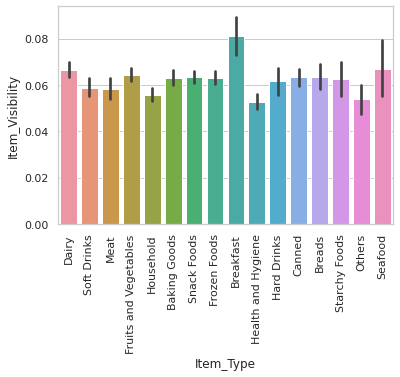

In [ ]:
sns.barplot(train['Item_Type'],train['Item_Visibility'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

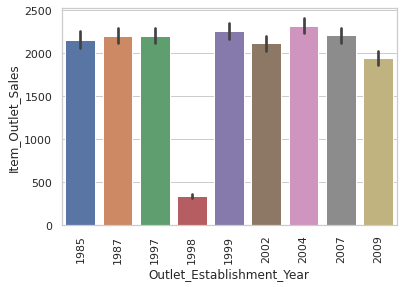

In [ ]:
sns.barplot(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

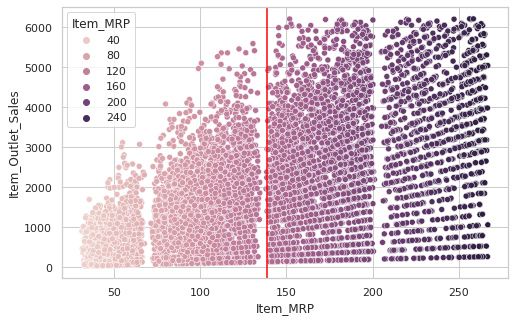

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',data=train)
plt.axvline(train['Item_MRP'].mean(),color='red',label='Mean')
plt.show()

We can see sales in 1998 is quite less.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new=le.fit_transform(train['Outlet_Identifier'])
new_mod=['Item_Fat_Content','Item_Identifier','Item_Type','Outlet_Type','Outlet_Location_Type','Outlet_Identifier']
for i in new_mod:
  train[i]=le.fit_transform(train[i])


In [ ]:
train.drop(['Outlet_Establishment_Year','Outlet_Size','Item_MRP'],axis=1,inplace=True)

In [ ]:
X=train.drop(['Item_Outlet_Sales'],axis=1)
Y=train['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

No handles with labels found to put in legend.


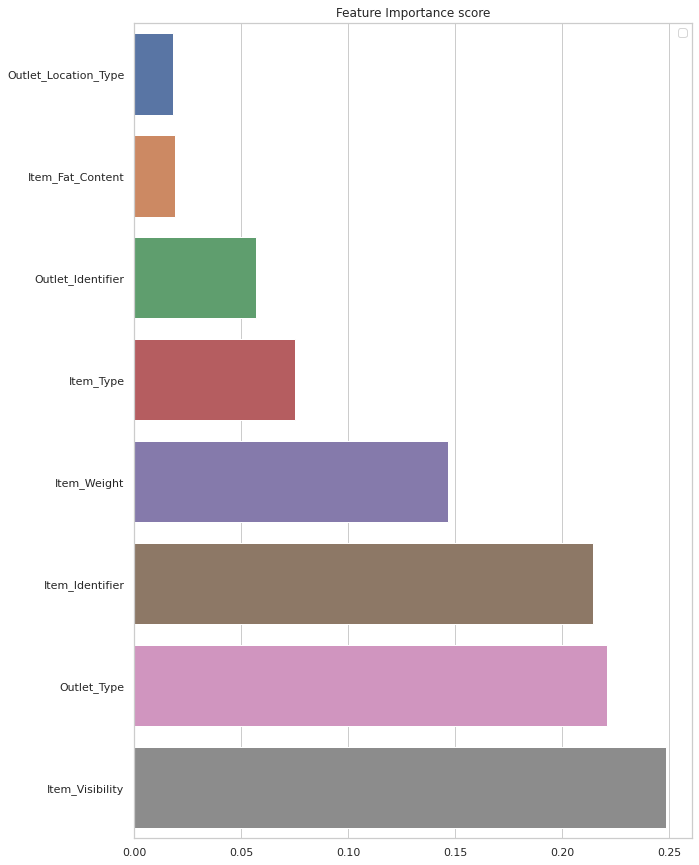

In [ ]:
feature_imp=pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=True)
plt.figure(figsize=(10,15))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.title('Feature Importance score')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred=rf.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
r2_score=r2_score(y_test,y_pred)
print('Mean Absolute Error:',round(MAE,4))
print('R2_score:',round(r2_score,4))
print('Root Mean Squared Error:',round(RMSE,4))


Mean Absolute Error: 919.4127
R2_score: 0.3211
Root Mean Squared Error: 1199.7295
